In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Online_Retail.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Check anomalies
print(len(df[df['Quantity'] < 0]))

# Drop negative quantities, customerID=null, subset 3 columns
df = df[df['Quantity'] > 0].dropna(subset=['CustomerID', 'InvoiceDate', 'InvoiceNo'])
df.shape

10624


(397924, 8)

In [6]:
# df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'Quantity'], keep='first', inplace=True)
df.shape

(392707, 8)

In [7]:
# Change type of CustomerID to object
df['CustomerID'] = df['CustomerID'].astype('int64').astype('str')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [8]:
# Change type of InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392707 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392707 non-null  object        
 1   StockCode    392707 non-null  object        
 2   Description  392707 non-null  object        
 3   Quantity     392707 non-null  int64         
 4   InvoiceDate  392707 non-null  datetime64[ns]
 5   UnitPrice    392707 non-null  float64       
 6   CustomerID   392707 non-null  object        
 7   Country      392707 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [9]:
# Calculate the numbers of orders received per month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


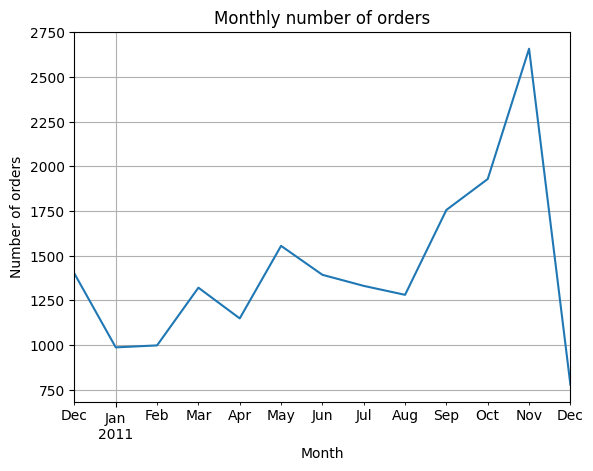

In [10]:
# Visualize monthly time-series data using line charts
df.groupby('InvoiceMonth')['InvoiceNo'].nunique().plot(kind='line', grid=True)
plt.title('Monthly number of orders')
plt.ylabel('Number of orders')
plt.xlabel('Month')
plt.show()

In [11]:
# Check max and min of InvoiceDate in December
df[df['InvoiceMonth'] == '2011-12']['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

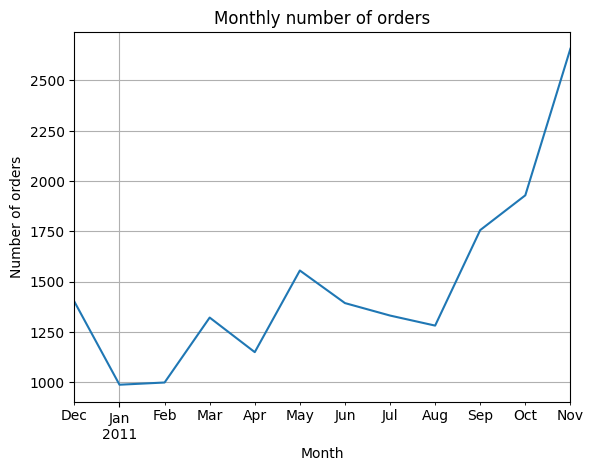

In [12]:
# Filter out incomplete data for December 2011
df = df[df['InvoiceMonth'] != '2011-12']
df.groupby('InvoiceMonth')['InvoiceNo'].nunique().plot(kind='line', grid=True)
plt.title('Monthly number of orders')
plt.ylabel('Number of orders')
plt.xlabel('Month')
plt.show()

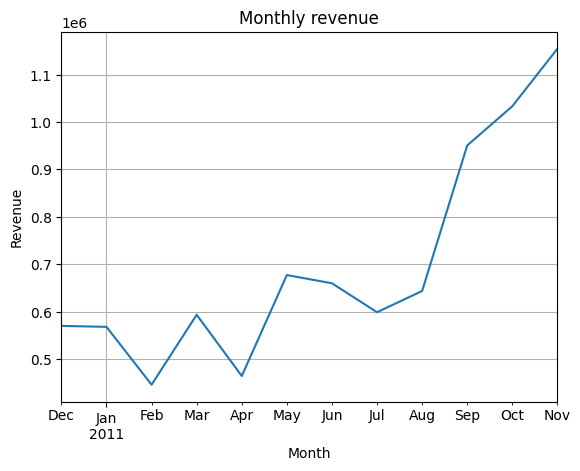

In [13]:
# Calculate the monthly revenue
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df.groupby('InvoiceMonth')['Revenue'].sum().plot(kind='line', grid=True)
plt.title('Monthly revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

In [14]:
# Calculate the number of repeat customers per month
repeat_customers = df.groupby(['InvoiceMonth', 'CustomerID'], as_index=False)['InvoiceNo'].count()
repeat_customers.rename(columns={'InvoiceNo': 'RepeatOrders'}, inplace=True)
repeat_customers.head()

,InvoiceMonth,CustomerID,RepeatOrders
0,2010-12,12347,31
1,2010-12,12348,17
2,2010-12,12370,90
3,2010-12,12377,43
4,2010-12,12383,37


In [15]:
repeat_customers.shape

(12440, 3)

In [16]:
#  Filter out customers who make only 1 purchase for a given month
repeat_customers = repeat_customers[repeat_customers['RepeatOrders'] > 1]
repeat_customers.shape

(12100, 3)

In [17]:
# Groupby year_month and count the number of CustomerID for each month
repeat_customers = repeat_customers.groupby('InvoiceMonth')['CustomerID'].count().reset_index()
repeat_customers.rename(columns={'CustomerID': 'RepeatCustomers'}, inplace=True)
repeat_customers.head()

,InvoiceMonth,RepeatCustomers
0,2010-12,855
1,2011-01,717
2,2011-02,726
3,2011-03,946
4,2011-04,831


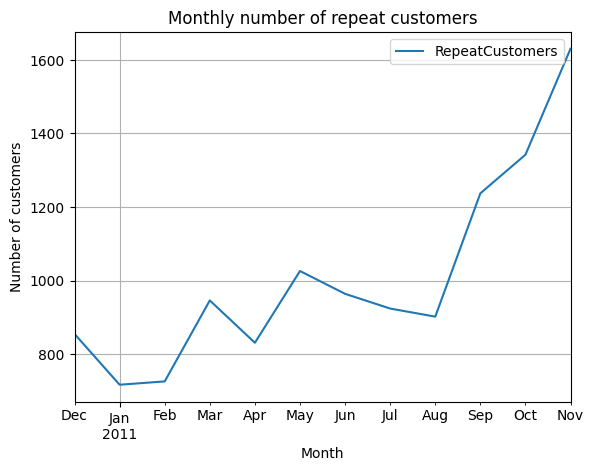

In [18]:
# Visualize the monthly number of repeat customers
repeat_customers.plot(kind='line', x='InvoiceMonth', y='RepeatCustomers', grid=True)
plt.title('Monthly number of repeat customers')
plt.ylabel('Number of customers')
plt.xlabel('Month')
plt.show()

In [19]:
# Track products with code 23084, 84826, 22197, 22086, and 85099B for each month
best_sellers = ['23084', '84826', '22197', '22086', '85099B']
best_sellers_by_month = df[df['StockCode'].isin(best_sellers)].groupby(['InvoiceMonth', 'StockCode'])['Quantity'].sum()

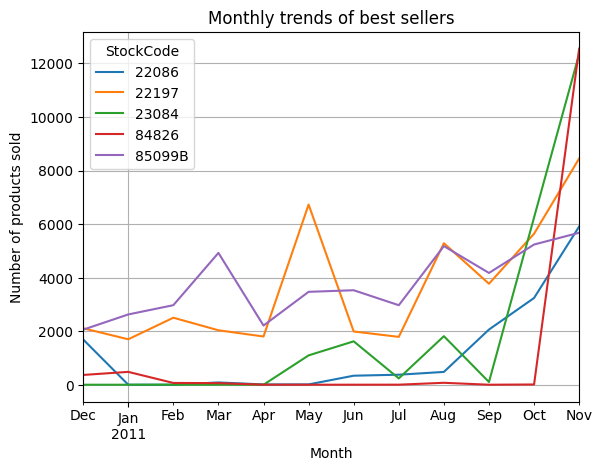

In [20]:
# Visualize the trends of each item over timex
best_sellers_by_month = best_sellers_by_month.unstack().fillna(0)
best_sellers_by_month.plot(kind='line', grid=True)
plt.title('Monthly trends of best sellers')
plt.ylabel('Number of products sold')
plt.xlabel('Month')
plt.show()
